In [1]:
%pip install numpy matplotlib pandas -Uq

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Polygon

## Setting the expectations

Obviously we could not cover those topics in full in one lecture. Both of them would really require a course of this own. Instead, this lecture is intended as a first step on your journey if you pursue these topics further. This is really more of a stand up than a real lecture about calculus. With this out the way, enjoy!

# Calculus

## It all starts with motion...

Calculus was developed simmultaneously by Goldfreid Leibnitz and Sir Isaac Newton to solve a very practical problem: give a mathematical description of motion. Say you travel from the SAS library to the cooler to take a drink. Along the way you stop for a moment to greet Akhmed and then proceed towards your goal picking up a faster pace to not accedentally get into another social interaction.

Let's denote your distance along that path as $l$, time as $t$. Then your average velocity $v$ will be given by $$v = \dfrac{l}{t}$$
Ratio of length divided by time, that is the definition of average velocity.

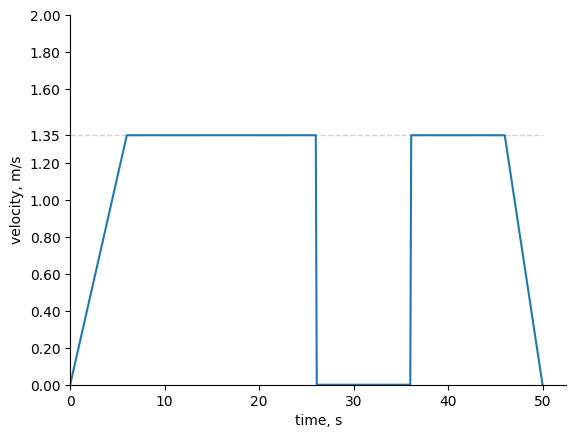

In [3]:
fig, ax = plt.subplots()

a1 = 0.225
a2 = -0.3375

t1 = np.arange(0, 6.1, 0.1)
t2 = np.linspace(6 , 26, 200)[1:]
t3 = np.linspace(26, 36, 100)[1:]
t4 = np.linspace(36, 46, 100)[1:]
t5 = np.linspace(46, 50, 40 )[1:]

dt5 = np.linspace(0, 4, 40)[1:]

v1 = a1 * t1
v2 = np.full_like(t2, v1[-1], dtype=float)
v3 = np.zeros_like(t3, dtype=float)
v4 = np.full_like(t3, v1[-1], dtype=float)
v5 = v4[-1] + a2 * dt5

t = np.concatenate((t1, t2, t3, t4, t5))
v = np.concatenate((v1, v2, v3, v4, v5))

yticks = np.arange(0, 2.2, 0.2)
yticks = np.append(yticks, v1[-1])
yticks = np.delete(yticks, round(1.4 / 0.2))

# Additional lines
ax.plot(
    [t[0], max(t)],
    [1.35, 1.35],  
    color="lightgray", 
    linestyle="--", 
    linewidth=1
)

ax.plot(t, v)
ax.set_xlabel("time, s")
ax.set_ylabel("velocity, m/s")

# Start at origin
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

ax.set_yticks(yticks)
# ax.grid(True)

# Ditch the box
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.show()

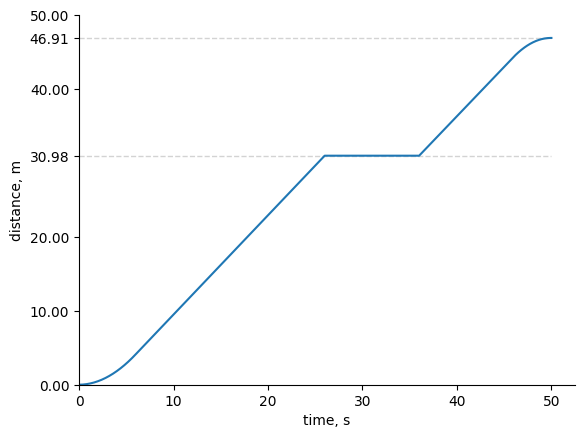

In [4]:
l = np.cumsum(v) / 10

fig, ax = plt.subplots()

yticks = np.append(np.arange(0, 60, 10), [l[-1], l[260]])
yticks = np.delete(yticks, 3)

# Additional lines
ax.plot(
    [t[0], max(t)],
    [30.98, 30.98],  
    color="lightgray", 
    linestyle="--", 
    linewidth=1
)

ax.plot(
    [t[0], max(t)],
    [46.91, 46.91],  
    color="lightgray", 
    linestyle="--", 
    linewidth=1
)

ax.plot(t, l)
ax.set_xlabel("time, s")
ax.set_ylabel("distance, m")

# Start at origin
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

ax.set_yticks(yticks)
# ax.grid(True)

# Ditch the box
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.show()

Assuming we don't carry a speedometer on us at all times and can only measure our immediate position, how do we calculate our speed (or alternatively how does a speedometer calculate our speed)? Turns out it is a nontrivial problem considering the velocitiy changes from moment to moment. It is trivial to find average velocitity over any period of time:

$$v_\text{avg} = \dfrac{l_1 - l_2}{t_1 - t_2} = \dfrac{\Delta l}{\Delta t}$$

In math we use the Greek letter uppercase delta $\Delta$ to denote change. $\Delta l$ and $\Delta t$ here simply mean change in velocity and time repsectively.

Geometrically what we find is this triangle, its tangent equal to average velocity:

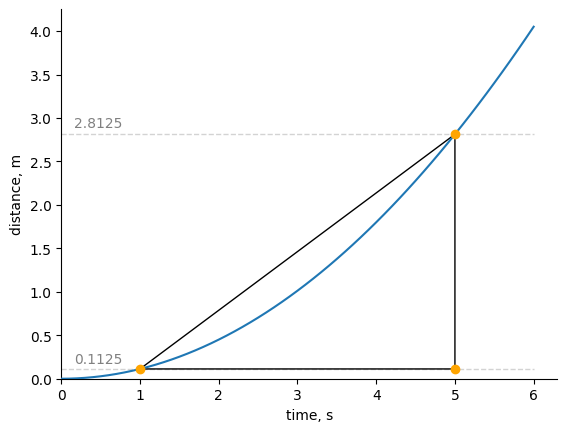

In [5]:
fig, ax = plt.subplots()

l1_func = np.vectorize(lambda t: a1 * t * t / 2)

l1 = l1_func(t1)

tri = (
    (t1[10], l1[10]),
    (t1[50], l1[10]),
    (t1[50], l1[50])
)

poly = Polygon(tri, fill=False, zorder=2)

ax.add_patch(poly)
ax.scatter([p[0] for p in tri], [p[1] for p in tri], color="orange", zorder=4)
ax.plot(t1, l1, zorder=3)
ax.set_xlabel("time, s")
ax.set_ylabel("distance, m")

# Start at origin
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

# Additional lines
ax.plot(
    [t1[0], max(t1)],
    [l1[10], l1[10]],  
    color="lightgray", 
    linestyle="--", 
    linewidth=1,
    zorder=1,
)
ax.text(0.16, 0.18, l1[10], color="gray",)
ax.plot(
    [t1[0], max(t1)],
    [l1[50], l1[50]],  
    color="lightgray", 
    linestyle="--", 
    linewidth=1,
    zorder=1,
)
ax.text(0.16, 2.9, l1[50], color="gray",)

# Ditch the box
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.show()

As the time iterval gets smaller and smaller the tangent of that triangle starts to approach a true tangent line at the point.

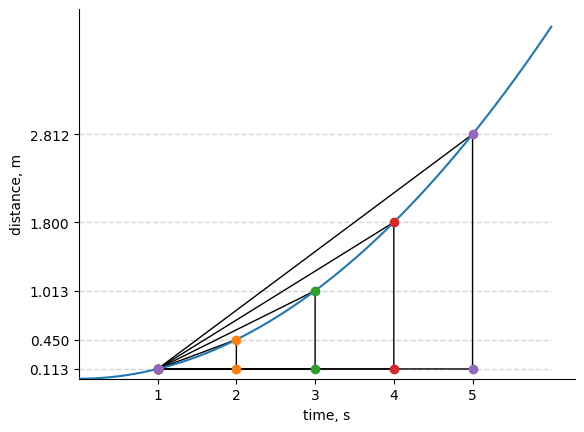

In [6]:
fig, ax = plt.subplots()

ticks = {"x": [], "y": []}
start = 10
step = 10
for i in range(5):    
    offset = start + step * i
    tri = (
        (t1[start] , l1[start]),
        (t1[offset] , l1[start]),
        (t1[offset], l1[offset])
    )
    poly = Polygon(tri, fill=False, zorder=3)
    ax.add_patch(poly)
    
    ax.scatter([p[0] for p in tri], [p[1] for p in tri], zorder=10)
    ticks["x"].append(tri[2][0])
    ticks["y"].append(tri[2][1])

    

ax.plot(t1, l1, zorder=5)
ax.set_xticks(ticks["x"])
ax.set_yticks(ticks["y"])
ax.set_xlabel("time, s")
ax.set_ylabel("distance, m")

# Additional lines
for y_value in [0.113, 0.45, 1.013, 1.8, 2.812]:
    ax.plot(
        [t1[0], max(t1)],
        [y_value, y_value],  
        color="lightgray", 
        linestyle="--", 
        linewidth=1,
        zorder=1
    )

# Start at origin
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

# Ditch the box
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.show()

Numerically we will see an interesting pattern emerge.

In [7]:
d = {"t+dt": [], "dt": [], "l+dt": [], "dl": [], "v_avg": []}

t_start = 1

dt_arr = [0.5, 0.1, 0.05, 0.01, 0.005, 0.001]

for dt in dt_arr:
    dl = l1_func(t_start + dt) - l1_func(t_start)
    v_avg = dl / dt

    d["t+dt"].append(t_start + dt)
    d["l+dt"].append(l1_func(t_start) + dl)
    d["dt"].append(dt)
    d["dl"].append(dl)
    d["v_avg"].append(v_avg)

d_arr = np.transpose(list(d.values()))
df = pd.DataFrame(d_arr, columns=["t+Δt", "Δt", "l+Δl", "Δl", "v = Δl/Δt"])
df

,t+Δt,Δt,l+Δl,Δl,v = Δl/Δt
0,1.500,0.500,0.253125,0.140625,0.281250
1,1.100,0.100,0.136125,0.023625,0.236250
2,1.050,0.050,0.124031,0.011531,0.230625
3,1.010,0.010,0.114761,0.002261,0.226125
4,1.005,0.005,0.113628,0.001128,0.225562
5,1.001,0.001,0.112725,0.000225,0.225112


As the interval we use to calculate average velocity gets smaller and smaller we are getting closer and closer to **instantaneous velocity** at that point - what we actually want to find. Let's write down those values in a table. This is quite powerful as we can get the value of a function we don't have a closed form expression for.

This is the mathematical notion of a limit. Average change approaches true instanteneous change. In other words when the distance over which we are evaluating the average gets **infinitestimal** (almost zero, but not quite) average velocity becomes instaneous velocity **in the limit**.

In math notation we express it like this:
$$
v(t) = \lim_{\Delta t \to 0} \dfrac{l(t + \Delta t) - l(t)}{\Delta t}
$$

It reads as "The limit of $\dfrac{l(t + \Delta t) - l(t)}{\Delta t}$ as $\Delta t$ approaches zero."

To solve a limit we need to remove the indeterminate forms: $\dfrac{0}{0}$, $\dfrac{\infty}{\infty}$, $0 \times \infty$, $\infty - \infty$, $0^0$, $1^\infty$, $\infty^0$ by manipulating the equation and then solve it by substituting 0 for *h*.

To be able to solve this limit we need to know the function that generates the position values, so it's good time to reveal it:
$$
l(t) = \dfrac{0.225 \times t^2}{2}
$$

This limit showing the change in output of our position function over an infinitestimally small change in the input is a individual case of a more general notion of **derivative**.

The definition of derivative is as follows:
$$
\dfrac{dy}{dx} = \lim_{h \to 0} \dfrac{f(x + h) - f(x)}{h}
$$

Read as "the derivative of y in respect to x". Derivative shows the instanteneous rate of change of outputs of a function in repsect to its inputs. Note that while it looks like a fraction it is better thought as one expression because it cannot be manipulated or simplified as a regular fraction. This is just one of the notations for the derivative, so called Leibniz notation.

Velocity is an individual example of derivative because by definition velocity is the change of position with respect to time:
$$
v(t) = \dfrac{dl}{dt} = \lim_{\Delta t \to 0} \dfrac{\Delta l}{\Delta t} = \lim_{\Delta t \to 0} \dfrac{l(t + \Delta t) - l(t)}{\Delta t}
$$


Finally we can solve this derivative like so:

1. Substitute *l(t)* into the definition.
2. Perform algebraic manipulation until it is legal to substitute $\Delta t = 0$.
3. Substitute $\Delta t = 0$ which evalutes the expression at the limit.
3. Simplify the result.

Performing this procedure in our case yields
$$
\begin{split}
v(t)
& = \dfrac{dl}{dt} \\
& = \lim_{\Delta t \to 0} \dfrac{l(t + \Delta t) - l(t)}{\Delta t} \\
& = \lim_{\Delta t \to 0} \dfrac{\dfrac{0.225 \times (t + \Delta t)^2}{2} - \dfrac{0.225 \times 0.5 t^2}{2}}{\Delta t} \\
& = \lim_{\Delta t \to 0} \dfrac{(0.1125(t + \Delta t)^2) - 0.1125 t^2}{\Delta t} \\
& = \lim_{\Delta t \to 0} \dfrac{(0.1125(t^2 + 2t(\Delta t) + \Delta t^2)) - 0.1125 t^2}{\Delta t} \\
& = \lim_{\Delta t \to 0} \dfrac{0.1125t^2 + 0.225t(\Delta t) + 0.1125\Delta t^2 - 0.1125 t^2}{\Delta t} \\
& = \lim_{\Delta t \to 0} \dfrac{0.225t(\Delta t) + 0.1125\Delta t^2}{\Delta t} \\
& = \lim_{\Delta t \to 0} \dfrac{\Delta t (0.225t + 0.1125\Delta t)}{\Delta t} \\
& = \lim_{\Delta t \to 0} 0.225t + 0.1125\Delta t \\
& = 0.225t + 0 \\
& = 0.225t
\end{split}
$$

Aside from simple cases first-order derivative usually returns a function of instantenous change in respect to the input variable like in this case. We can take the derivative of the first-order derivative to obtain second-order derivative. In the case of motion second-order derivative describes acceleration (the rate of change of velcity): 

$$
\begin{split}
a(t)
& = \dfrac{d}{dt}v(t) \\
& = \lim_{\Delta t \to 0} \dfrac{v(t + \Delta t) - v(t)}{\Delta t} \\
& = \lim_{\Delta t \to 0} \dfrac{0.225t + 0.225 \Delta t - 0.225t}{\Delta t} \\
& = \lim_{\Delta t \to 0} \dfrac{0.225 \Delta t}{\Delta t} \\
& = \lim_{\Delta t \to 0} 0.225 \\
& = 0.225 \\
\end{split}
$$

As we can see the acceleration for that motion is constant and not a function of time like the velocity, so it is an example of motion under constant acceleration.

### Uses of derivative

While velocity is the most obvirous example and might be what calculus was origianlly developed for, derivative crops up everywhere we want to measure the rate of change: infection rates, cell growth, interest rates (remeber the derivative of *e*?), temperatures, utilities in game theory, you name it. It is very common in mathematics for a method to be developed in one field and then turn out to be applicable in a broad range of other disciplines.

### Note on the notation

Another notation commonly used is Lagrange notation. It denotes the derivative of a function with a tick:
$$
f'(x) = \dfrac{dy}{dx}
$$

Sometimes in physics derivative is denoted as y (or another output variable) with a dot, this is the notation first used by Sir Isaac Newton:
$$
\dot y = \dfrac{dy}{dx}
$$

All of those are equivalent and Leibniz notation is the most common.

We denote second-, third-, and so on orders of the derivatives as powers in Leibniz notation, extra ticks or numbers in Lagrange, and extra dots in Newton (although derivatives higher than second order are seldom expressed in this notation):
$$
\begin{split}
& \dfrac{d^2 y}{d x^2} = f''(x) = \ddot y \\
\\
& \dfrac{d^3 y}{d x^3} = f'''(x) = \stackrel{\textbf{...}}{y} \\
\\
& \dfrac{d^n y}{d x^n} = f^{(n)} = \stackrel{n}{y}
\end{split}
$$

### Manipulating Derivatives

#### Some convinient rules

| Name            | Formulation
|-----------------|---
| Constant rule   | if *y* is constant, then for all *x*, $\dfrac{dy}{dx} = 0$
| Sum rule        | $\dfrac{d}{dx}(af(x) + bg(x)) = a\dfrac{d}{dx}f(x) + b\dfrac{d}{dx}g(x)$
| Power rule      | $\dfrac{d}{dx}x^n = nx^{n-1}$
| Product rule    | $\dfrac{d}{dx}(f(x) \times g(x)) = \dfrac{d}{dx}f(x) \times g(x) + f(x) \times \dfrac{d}{dx}g(x)$
| Chain rules     | $\dfrac{d}{dx}f(g(x)) = \dfrac{d}{dg(x)}f(x) \dfrac{d}{dx}g(x)$
| Euler           | $\dfrac{d}{dx}e^x = e^x$
| Sine and cosine | $\dfrac{d}{dx}\sin x = \cos x,\ \dfrac{d}{dx}\cos x = - \sin{x}$

Derivative can seem intimidating, but because of all of these properties it is actually quite trivial to computer once you've had some practice.

## Integral

The need to compute a "continuous summation," where the rate of growth is a known function, is a common concept in engineering and science. The calculus tool used to compute these sums is the **integral**.

There are two important ways of approaching the integral. The first way is essentially to make the notion of "summing up many tiny elements" a bit more precise and introduce some mathematical formalism. The other way is to compare the integral to the derivative. It's important to understand both interpretations.

For discrete sum and product we use capital sigma and pi symbols in math. They are similar conceptually to a for loop in programming although more general.

<img width=600px style="display:block" src=./E_ApQ0vWQAUfiKW.png>
<small>source: @FreyaHolmer on x.com</small>

In [8]:
t = np.arange(0, 11, 0.5)
v = np.zeros_like(t)
l = np.zeros_like(t)

g = 9.8 # m/s^2 - freefall acceleration

v = g * t
l = v * t

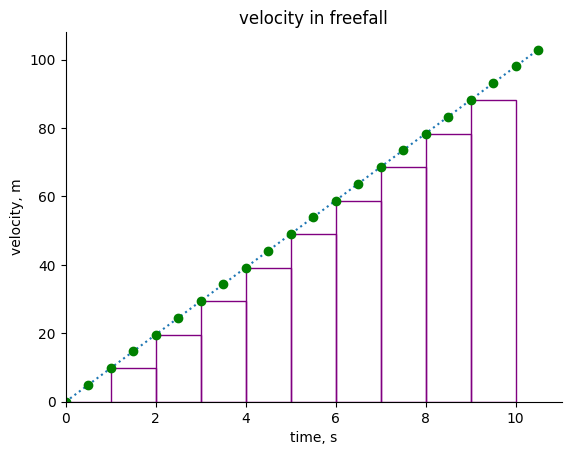

In [9]:
fig, ax = plt.subplots()

step = 2
for i in range(len(t) - step)[::step]:
    sq = (
        (t[i], 0),
        (t[i], v[i]),
        (t[i+step], v[i]),
        (t[i+step], 0)
    )
    ax.add_patch(Polygon(sq, fill=False, color="purple"))

ax.plot(t, v, ":")
ax.plot(t, v, "go")
ax.set_xlabel("time, s")
ax.set_ylabel("velocity, m")
ax.set_title("velocity in freefall")

# Start at origin
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

# Ditch the box
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.show()

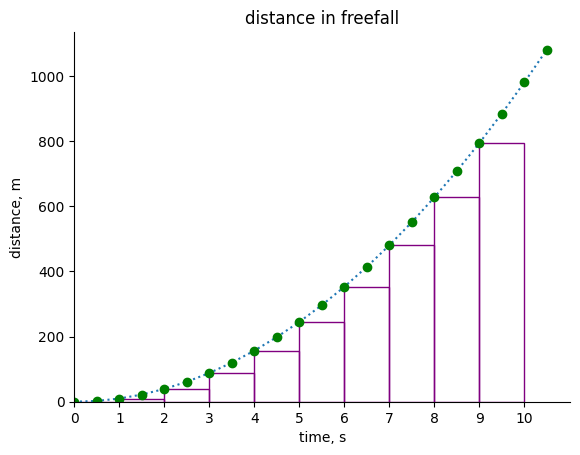

In [10]:
fig, ax = plt.subplots()

step = 2
for i in range(len(t) - step)[::step]:
    sq = (
        (t[i], 0),
        (t[i], l[i]),
        (t[i+step], l[i]),
        (t[i+step], 0)
    )
    ax.add_patch(Polygon(sq, fill=False, color="purple"))

ax.plot(t, l, ":")
ax.plot(t, l, "go")
ax.set_xlabel("time, s")
ax.set_ylabel("distance, m")
ax.set_xticks(list(filter(lambda x: np.floor(x) == x, t)))
ax.set_title("distance in freefall")

# Start at origin
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

# Ditch the box
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.show()

Let's turn this summation into mathematics notation, in which we compute the area under the curve $f(x)$
in the interval $a \leq x \leq b$. We partition this interval into $n$ slices, each having the width $\Delta x = \dfrac{b -a}{n}$. The *i*-th rectangle will have a left-hand coordinate $x_i$, a height equal to $f(x_i)$, and an area of $f(x_i) \Delta x$. Using summation notation, we add up all these rectangles:
$$
\text{Area} \approx \sum^n_{i = 1} f(x_i) \Delta x
$$

The error in this approximation decreases as we increase the number of slices $n$. By taking the limit as $n$ increases without bound and the slices become infinitesimally small, we get our definition of the **definite integral**:

$$
\int^b_a f(x)dx = \lim_{n \to \infty} \sum^n_{i = 1} f(x_i) \Delta x. \\
\text{where} \\
\Delta x = \dfrac{b - a}{n},\ x_i = a + i \Delta x
$$




## Indefinite Integral and Antiderivative

For the derivative, we were able to manipulate the expression being taken to the limit such that we could simply substitute $\Delta t = 0$, but this isn't posibile with the forumla for the derivative. This formula is mostly useful as a way to recognize when the problem you have is an integral, and is helpful to properly turn that problem into integral notation. It's also used when we approximate integrals numerically, where instead of taking the slice width down to zero, we just stop at some small but finite $\Delta t$. But this definition is not used to solve integrals with pen and paper.

If we know the velocity function $v(t)$ by applying the rules of differentiation you've learned in reverse we can find the position functiion $x(t)$ as an anti-derivative of $v(t)$ i.e. $x(t)$ is the function that when differentiated yields $v(t)$:
$$
\begin{split}
v(t) =\ & \dot x(t) = v_0 + at, \\
& x(t) = \dfrac{v_0t + at^2}{2}
\end{split}
$$

We've stated in a general way that there is some relationship between the (definite) integral and the antiderivative. So we know that in a certain sense the operations of integration and differentiation are inverse operations. The theorem of calculus that summarizes these relationships precisely goes by an important-sounding name: the fundamental theorem of calculus. The theorem actually consists of two parts. (Sources don't always list them in the same order.)

The first part shows how a definite integral may be computed by using an antiderivative:

Let $f(x) = \dfrac{d}{dx}F(x)$, then the definite integral $\int^a_b f(x) dx$ can be computed as:
$$
\int^b_a f(x) dx = F(b) - F(a)
$$

This equation seems abstract but when we replace generic terms with the ones specific to velocity, it seems to state the obvious:
$$
\int^b_a v(t) dt = x(b) - x(a)
$$

This says that the cumulative effect of velocity from time *a* to time *b* (the net displacement during that interval), is equal to the difference in the position at time *b* and the position at time *a*

The second part of the fundamental theorem of calculus is the flip side of the first part. The first part said that definite integrals can be calculated by using antiderivatives; the second part shows how to define an antiderivative in terms of a definite integral:

Let $F(t)$ be defined by 
$$
F(t) = \int^t_{t_0} f(u) du
$$
Then the derivative of $F(t)$ is given by
$$
\dfrac{d}{dt}F(t) = f(t)
$$

An **indefinite integral** is an integral with implied limit of integration at *t*, it is equivalent to anti-derivative. Note though that it is quite destinct from definite integral: definite integral returns a value, but indefinite integral is a function of t:

$$
\int f(t) dt = \int^t_{t_0} f(u) du = F(t) + C, \quad C = -F(t_0)
$$


## Applications of Integral

One can use mathematics to develop an understanding of how the cases are distributed in a given population (sample) or an expectation of how cases should be distributed given one’s beliefs about the process that produces the variation in that concept (or variable). 

Probability distribution is the mathematical function that gives the probabilities of occurrence of possible outcomes for an experiment.
Some of the most widely used distributions are continious. Probability density function provides a relative likelihood that the value of the random variable would be equal to a sample at which it is evaluated. It is defined with a definite integral:
$$
\Pr(X \in [a, b]) = \int^b_a f(x) dx
$$

Odometer in your car, or electricity meter in your home they all use integration to determine the cumulative ammount of some quntity (distance, power respectively)!
